# Familiarisation with PyTorch

In [41]:
# pytorch
import torch
from torchvision import transforms,datasets
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import numpy as np
import os

# pyplot
import matplotlib.pyplot as plt
from MNIST_dataloader import *

Data loading

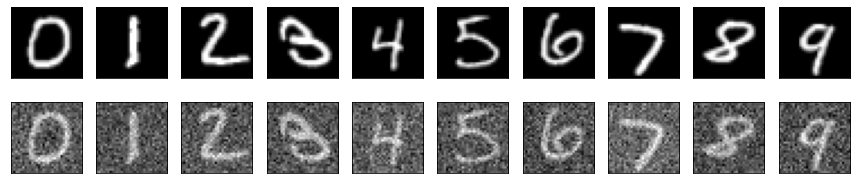

In [42]:
    # define parameters
    data_loc = os.path.abspath(".") #change the datalocation to something that works for you
    batch_size = 64
    
    # get dataloader
    train_loader, test_loader = create_dataloaders(data_loc, batch_size)
    
    # get some examples
    examples = enumerate(test_loader)
    _, (x_clean_example, x_noisy_example, labels_example) = next(examples)
    # use these example images througout the assignment as the first 10 correspond to the digits 0-9
    
    # show the examples in a plot
    plt.figure(figsize=(12,3))
    for i in range(10):
        plt.subplot(2,10,i+1)
        plt.imshow(x_clean_example[i,0,:,:],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(2,10,i+11)
        plt.imshow(x_noisy_example[i,0,:,:],cmap='gray')
        plt.xticks([])
        plt.yticks([])
    
    plt.tight_layout()
    plt.savefig(r"figure\data_examples.png",dpi=300,bbox_inches='tight')
    plt.show()

check data size

In [43]:
x_clean_example[1,0,:,:].size()

torch.Size([32, 32])

In [44]:
USE_GPU = True
dtype = torch.float32
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Interval for printing loss during training
print_every = 100

print(f'Using device:{device}')

Using device:cpu


## b) Build up a fully connected network with linear layers

In [ ]:
class ThreeLayerFC(nn.Module):
    def __init__(self,in_neuron,hidden1_neuron,hidden2_neuron,out_neuron):
        super().__init__()
        self.fc1 = nn.Linear(in_neuron,hidden1_neuron)
        self.fc2 = nn.Linear(hidden1_neuron,hidden2_neuron)
        self.fc3 = nn.Linear(hidden2_neuron,out_neuron)
    def forward(self,x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

def test_ThreeLayerFC():
    x = torch.zeros((64,32,32)).view((64,32*32))
    model = ThreeLayerFC(in_neuron=32*32,hidden1_neuron=64*64,hidden2_neuron=128*128,out_neuron=32*32)
    result = model(x)
    print(result.shape)

test_ThreeLayerFC()

In [48]:
# split train and validation data. In Gesamt gibt es 938 batches.
train_loader.__len__()

938

In [ ]:
# trainer
def trainer(model,optimizer, epochs=1):
    model = model.to(device=device)